# My fuzzy logic with Julia

## Description
Fuzzy control system that determines the required rest time of a worker according to age and the number of hours worked before rest.

## Input:

1. Age as `age` (years)
2. Number of hours worked before rest as `hours_worked` (hours)

## Output:
1. Required rest time as `rest` (minutes)

## Membership functions

1. `age` => 15..=80 years
2. `work_hours` => 1..=2 hours
3. `rest` => 15..=120 minutes

## Inference rules

### age 15..=80 years
1. `junior` == 15..=30
2. `mid` == 35..=50
3. `senior` == 60..=80

### `worked_hours` 1..=12 hours
1. `little` == 1..=2
2. `medium` == 4..=6
3. `much` == 8..=12

### `rest` 10..=120 minutes
1. light == 10..=15
2. sufficient == 25..=60
3. proper == 90..=120

## Importing necessary libraries

In [1]:
using FuzzyLogic # For Fuzzy Logic
using Plots # For Plots

In [2]:
# Define the fuzzy inference system using the mamfis function
fis = @mamfis function rest_time(age, hours_worked)::rest

    # Define the domains and membership functions for age
    age := begin
        domain = 15:80
        junior = TrapezoidalMF(15, 15, 30, 35)
        mid = TrapezoidalMF(30, 35, 50, 60)
        senior = LinearMF(50, 60)
    end

    # Define the domains and membership functions for hours_worked
    hours_worked := begin
        domain = 1:12
        little = TrapezoidalMF(1, 1, 2, 4)
        average = TrapezoidalMF(2, 4, 6, 8)
        much = LinearMF(6, 8)
    end

    # Define the domains and membership functions for rest
    rest := begin
        domain = 10:120
        light = LinearMF(25, 15)
        sufficient = TrapezoidalMF(15, 25, 60, 90)
        proper = LinearMF(60, 90)
    end

    # age: Junior rules
    (age == junior && hours_worked == little) --> rest == light
    (age == junior && hours_worked == average) --> rest == light
    (age == junior && hours_worked == much) --> rest == sufficient

    # age: Mid rules
    (age == mid && hours_worked == little) --> rest == light
    (age == mid && hours_worked == average) --> rest == sufficient
    (age == mid && hours_worked == much) --> rest == proper

    # age: Senior rules
    (age == senior && hours_worked == little) --> rest == sufficient
    (age == senior && hours_worked == average) --> rest == proper
    (age == senior && hours_worked == much) --> rest == proper

    # I was told to use
    and = MinAnd # "to activate the rules we use the MIN operator"
    implication = MinImplication # in example implication output "MIN(0,65;0)=0"
    aggregator = MaxAggregator # "In the case of aggregation, we use the MAX operator"
    defuzzifier = CentroidDefuzzifier # "We calculate the result using the centre of gravity method"
    or = MaxOr # I don't use it but it's a default
    # These are the defaults ones but I want to be explicit
end

rest_time

Inputs:
-------
age ∈ [15, 80] with membership functions:
    junior = TrapezoidalMF{Int64}(15, 15, 30, 35)
    mid = TrapezoidalMF{Int64}(30, 35, 50, 60)
    senior = LinearMF{Int64}(50, 60)

hours_worked ∈ [1, 12] with membership functions:
    little = TrapezoidalMF{Int64}(1, 1, 2, 4)
    average = TrapezoidalMF{Int64}(2, 4, 6, 8)
    much = LinearMF{Int64}(6, 8)


Outputs:
--------
rest ∈ [10, 120] with membership functions:
    light = LinearMF{Int64}(25, 15)
    sufficient = TrapezoidalMF{Int64}(15, 25, 60, 90)
    proper = LinearMF{Int64}(60, 90)


Inference rules:
----------------
(age is junior ∧ hours_worked is little) --> rest is light
(age is junior ∧ hours_worked is average) --> rest is light
(age is junior ∧ hours_worked is much) --> rest is sufficient
(age is mid ∧ hours_worked is little) --> rest is light
(age is mid ∧ hours_worked is average) --> rest is sufficient
(age is mid ∧ hours_worked is much) --> rest is proper
(age is senior ∧ hours_worked is little

## For some reason

I get too many rules even thought I have only 9 of them.

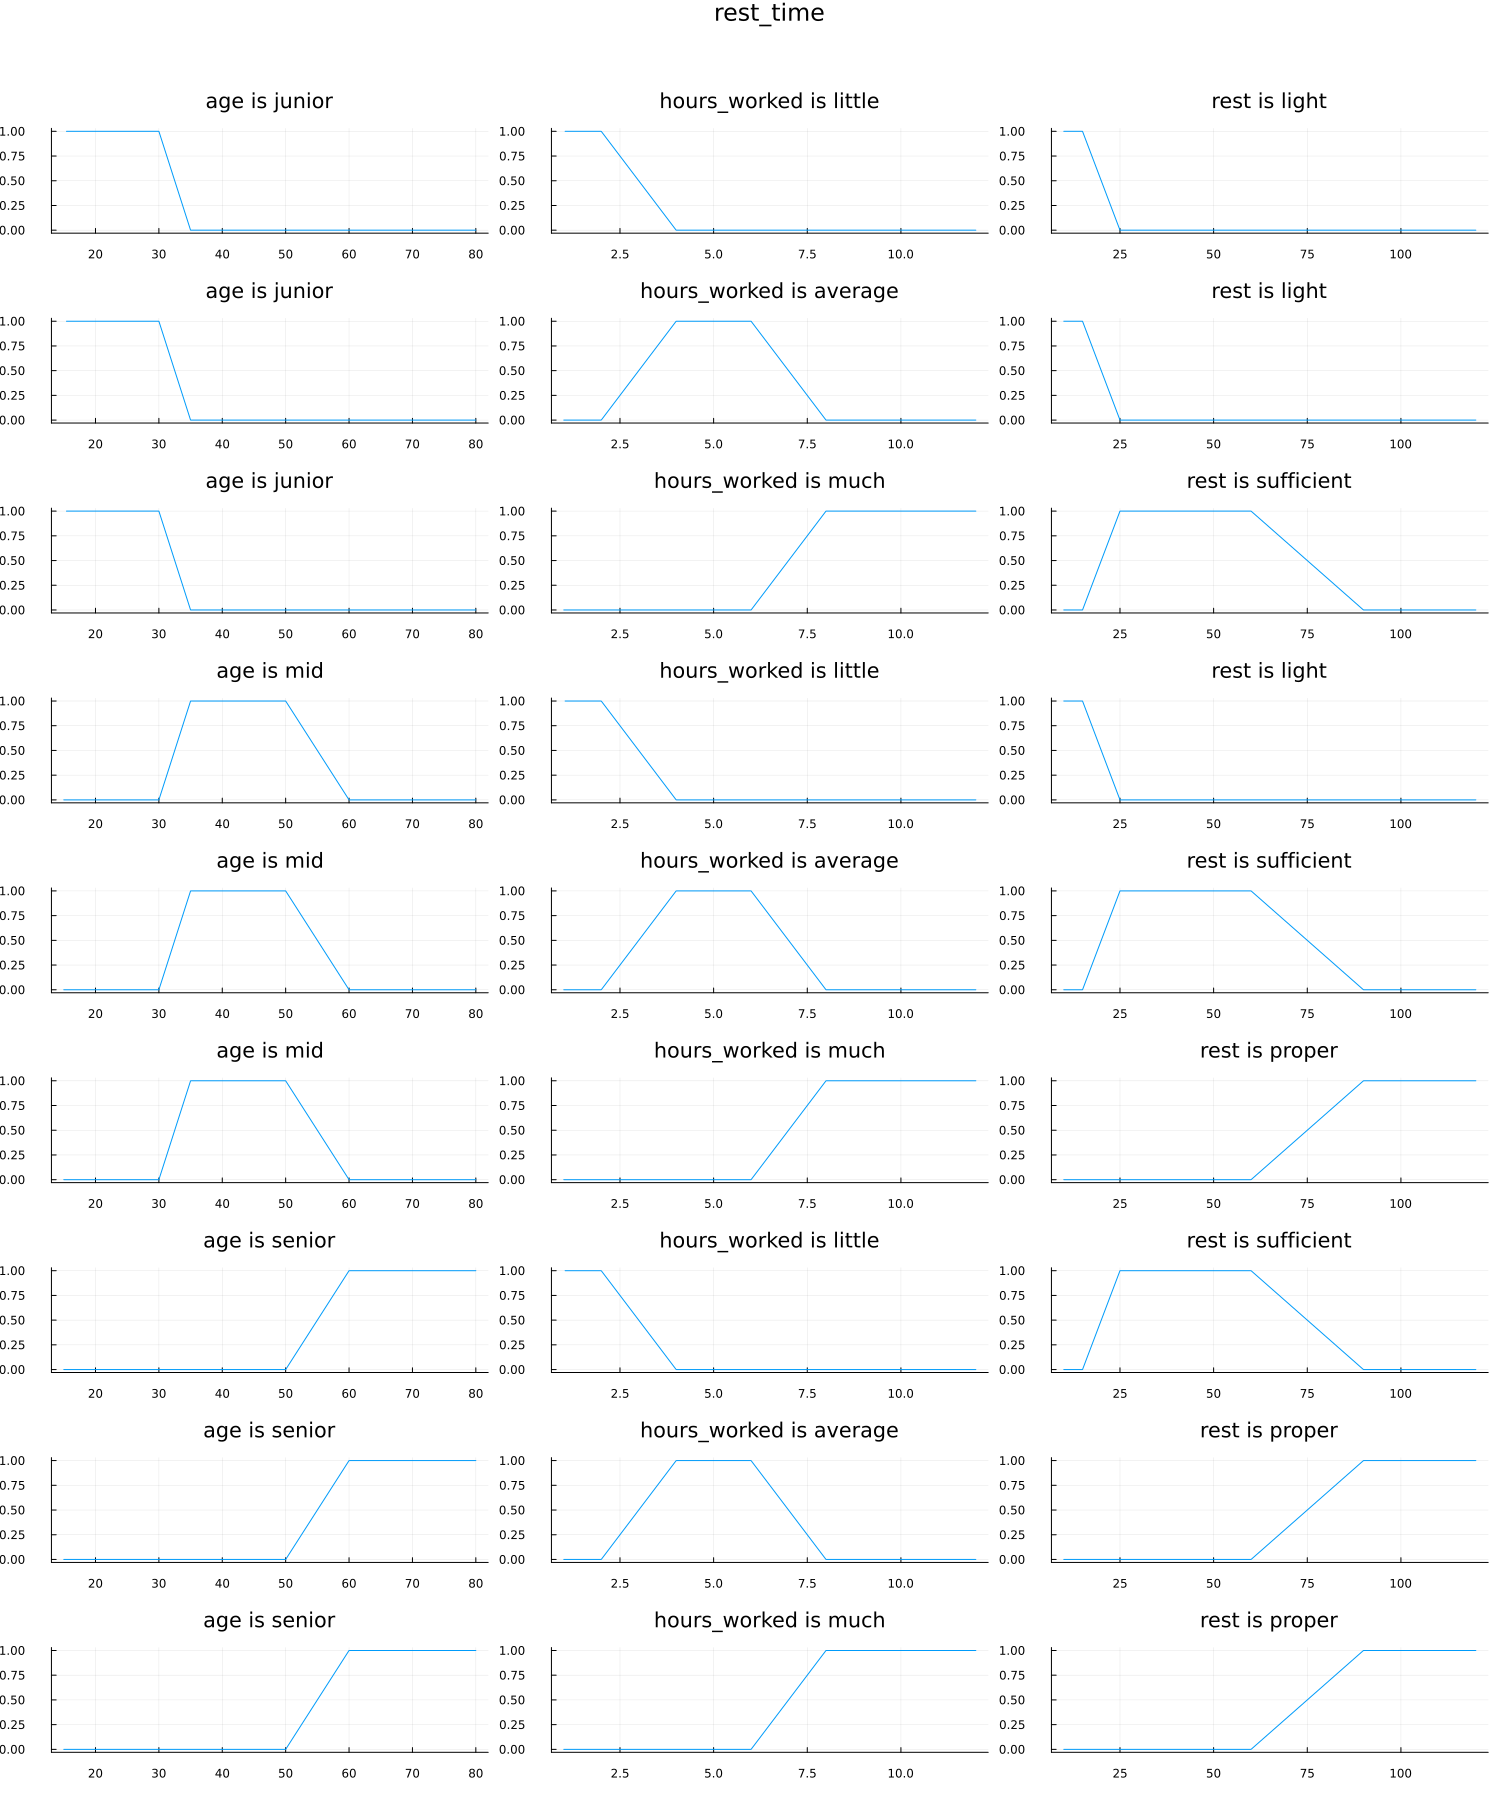

In [3]:
rules_plot = plot(fis; size=(1500,1800))
rules_plot

## Membership functions for

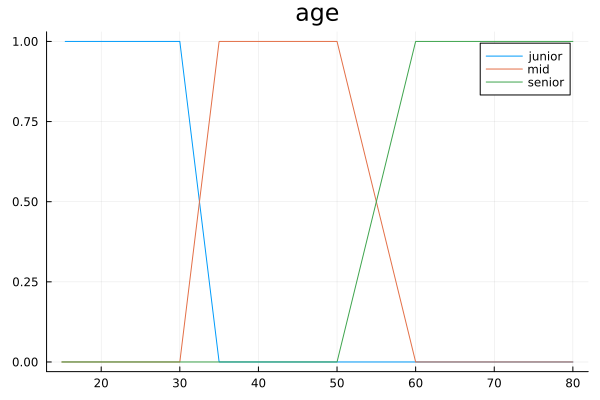

In [4]:
membership_function_age = plot(fis, :age)
membership_function_age

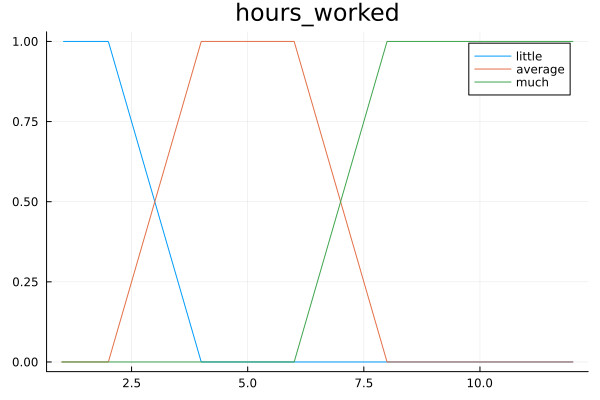

In [5]:
membership_function_age = plot(fis, :hours_worked)

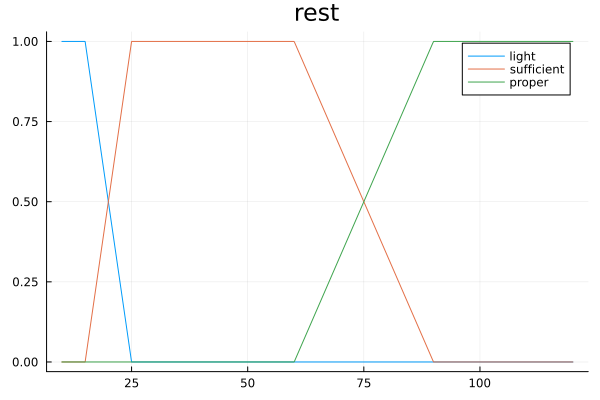

In [6]:
plot(fis, :rest)

## Getting output

Probably related to weirdly interpreted inference rules.

In [7]:
res = fis(age=80, hours_worked=2)
res

1-element Dictionaries.Dictionary{Symbol, Float64}
 :rest │ 48.10488

In [8]:
res[:rest]

48.10488